## Feature Engineering and Polynomial Regression

### Tools

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import run_gradient_descent_feng, zscore_normalize_features
np.set_printoptions(precision=2)

### Polynomial Features

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


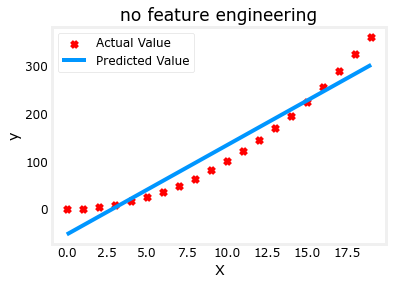

In [2]:
# create target data

x = np.arange(0, 20)
y = 1 + x**2
X = x.reshape(-1,1)

model_w, model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-2)

plt.scatter(x, y, marker = 'x', c='r', label = "Actual Value")
plt.title('no feature engineering')
plt.plot(x,X*model_w + model_b, label = "Predicted Value")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

* 실제 데이터는 2차 함수의 형태를 띄지만 모델은 1차 함수의 형태이기 때문에 정확히 예측하지 못함.
* feature engineering을 통해 feature의 형태를 바꿔야 함.

In [3]:
# Create target data

x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features
X = x**2

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


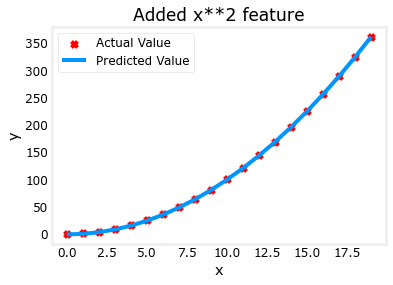

In [4]:
X = X.reshape(-1,1)

model_w, model_b = run_gradient_descent_feng(X, y, iterations = 10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label = "Actual Value")
plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w)+ model_b, label = 'Predicted Value')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

* feature을 2차 형태로 변경하니 모델이 데이터에 더욱 적합해짐.

### Selecting Features

* 모델을 만들 때 feature의 형태가 항상 명확한 것이 아님.
* 다양한 feature의 형태를 설정해서 최적의 feature을 선택할 수 있음.

In [5]:
# Create target data

x = np.arange(0, 20, 1)
y = x**2

# Engineer features
X = np.c_[x, x**2, x**3]

In [6]:
model_w, model_b = run_gradient_descent_feng(X, y, iterations = 10000, alpha = 1e-7)

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


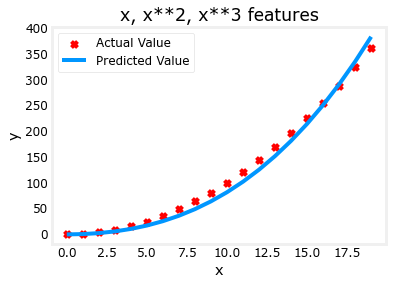

In [7]:
plt.scatter(x, y, marker = 'x', c='r', label="Actual Value")
plt.title("x, x**2, x**3 features")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106

* 3차 함수 형태로 feature을 설정하고 gradient descent을 돌려보니 x**3 항의 W가 가장 작은 것을 확인
* x**2 항의 W가 가장 큰 것을 통해 2차 항의 feature에 가장 큰 가중치가 설정되는 것을 확인
* Gradient descent를 통해 어떤 feature의 형태가 적합할지 알 수 있음.

### An Alternate View

In [8]:
# Create target data
x = np.arange(0,20,1)
y = x**2

# engineer features
X = np.c_[x,x**2,x**3]
X_features = ['x','x^2','x^3']

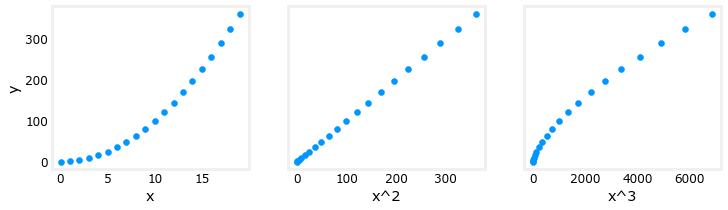

In [9]:
fig, ax = plt.subplots(1, 3, figsize = (12,3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

* x**2의 형태가 실제 값과 가장 일치하는 선형의 그래프를 보여줌.

### Scaling features

* Data set이 서로 범위의 차이가 큰 feature을 가지고 있을 경우는 경사하강법의 속도를 높이기 위해서 feature scaling을 적용해야 함.
* 위의 예시도 x, x^2, x^3가 서로 차이 큰 범위를 가지게 되기에 feature scaling을 적용

In [24]:
# Create target data
x = np.arange(0,20,1)
X = np.c_[x,x**2,x**3]
print(f"Peak to Peak range by column in Raw:\t X:{np.ptp(X, axis = 0)}")

# add mean_normalization
X = zscore_normalize_features(X)
print(f'Peak to Peak range by column in Normalized X:{np.ptp(X,axis = 0)}')


Peak to Peak range by column in Raw:	 X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]


* feature scaling을 통해 feature 사이의 범위 차가 줄어든 것을 확인할 수 있음.

Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


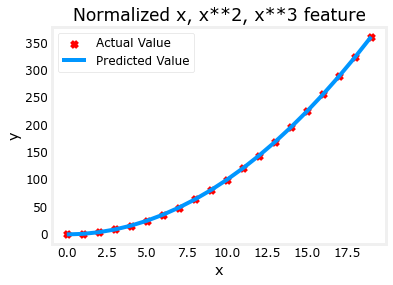

In [28]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x,x**2,x**3]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations = 100000, alpha = 1e-1)

plt.scatter(x, y, marker = 'x', c= 'r', label = 'Actual Value')
plt.title("Normalized x, x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label = "Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000

* feature scaling을 통해 data set에 적합한 parameter를 경사하강법을 통해 더욱 빠르게 찾을 수 있음.
* x**1과 x**3의 parameter 값이 0에 가까짐에 따라 영향력이 없어지고 x**2 feature가 가장 영향력이 큼을 알 수 있음.

### Complex Functions

Iteration         0, Cost: 2.24887e-01
Iteration    100000, Cost: 2.31061e-02
Iteration    200000, Cost: 1.83619e-02
Iteration    300000, Cost: 1.47950e-02
Iteration    400000, Cost: 1.21114e-02
Iteration    500000, Cost: 1.00914e-02
Iteration    600000, Cost: 8.57025e-03
Iteration    700000, Cost: 7.42385e-03
Iteration    800000, Cost: 6.55908e-03
Iteration    900000, Cost: 5.90594e-03
w,b found by gradient descent: w: [-1.61e+00 -1.01e+01  3.00e+01 -6.92e-01 -2.37e+01 -1.51e+01  2.09e+01
 -2.29e-03 -4.69e-03  5.51e-02  1.07e-01 -2.53e-02  6.49e-02], b: -0.0073


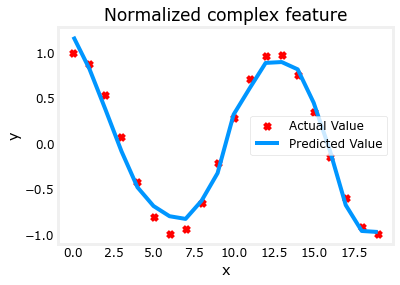

In [35]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12,x**13]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X,y,iterations = 1000000, alpha = 1e-1)

plt.scatter(x,y, marker='x', c='r', label = 'Actual Value')
plt.title("Normalized complex feature")
plt.plot(x,X@model_w+model_b, label = 'Predicted Value')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()